In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt # data visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import seaborn as sns

### Load Data 

In [36]:
data = pd.ExcelFile("Complains-Data.xlsx")
df = data.parse("Complains Data")

In [37]:
df.head(5)

,ID,ComplainDate,CompletionDate,CustomerID,BrokerID,ProductID,ComplainPriorityID,ComplainTypeID,ComplainSourceID,ComplainCategoryID,ComplainStatusID,AdministratorID,ClientSatisfaction,ExpectedReimbursement,Handled_By
0,17,2011-12-27,2012-01-27,872360,10637,4,1,5,5,11,9,98.0,NSA,0.0,1003
1,18,2011-12-27,2012-01-18,2004046,12116,12,1,3,5,10,9,98.0,NSA,0.0,1017
2,19,2011-12-27,2012-02-14,211339,11104,6,1,3,5,18,9,98.0,NSA,0.0,1013
3,20,2011-12-27,2012-01-11,1799451,11474,8,1,7,3,10,9,98.0,NSA,0.0,1005
4,28,2011-12-30,2012-01-05,1857235,10127,32,1,7,3,11,9,98.0,NSA,0.0,1006


In [34]:
df.dtypes

ID                         int64
BrokerID                   int64
ProductID                  int64
ComplainPriorityID         int64
ComplainTypeID             int64
ComplainSourceID           int64
ComplainCategoryID         int64
AdministratorID          float64
ClientSatisfaction        object
ExpectedReimbursement    float64
Handled_By                 int64
ProcessingDays           float64
dtype: object

### Feature engineering 

In [38]:
df['ProcessingDays'] = (df['CompletionDate'] - df['ComplainDate']).dt.days

### Drop uneccessary Columns

In [39]:
df.drop(columns=["ComplainDate","CompletionDate","ComplainStatusID","CustomerID"], inplace=True)
df_na = df.copy()

### Drop rows with missing columns

In [40]:
# drop rows with missing values
df.dropna(axis=0, inplace=True)

### Explanitory Data Analysis

In [41]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 1 categorical variables

The categorical variables are : ['ClientSatisfaction']


In [42]:
# print number of labels in ClientSatisfaction variable
#labels SAT or NSA
print('ClientSatisfaction contains', len(df['ClientSatisfaction'].unique()), 'labels')

ClientSatisfaction contains 2 labels


Text(0, 0.5, 'Number of Clients')

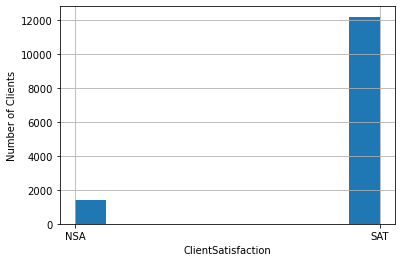

In [43]:
fig = df.ClientSatisfaction.hist(bins=10)
fig.set_xlabel('ClientSatisfaction')
fig.set_ylabel('Number of Clients')

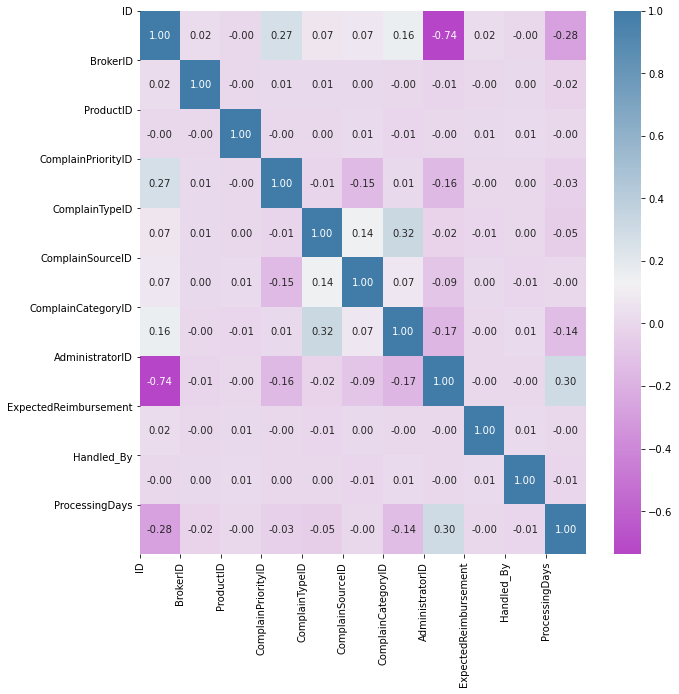

In [45]:
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10,10))
#Generate Color Map
colormap = sns.diverging_palette(300, 600, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [44]:
df.head()

,ID,BrokerID,ProductID,ComplainPriorityID,ComplainTypeID,ComplainSourceID,ComplainCategoryID,AdministratorID,ClientSatisfaction,ExpectedReimbursement,Handled_By,ProcessingDays
0,17,10637,4,1,5,5,11,98.0,NSA,0.0,1003,31.0
1,18,12116,12,1,3,5,10,98.0,NSA,0.0,1017,22.0
2,19,11104,6,1,3,5,18,98.0,NSA,0.0,1013,49.0
3,20,11474,8,1,7,3,10,98.0,NSA,0.0,1005,15.0
4,28,10127,32,1,7,3,11,98.0,NSA,0.0,1006,6.0


In [62]:
df =  df[['ProcessingDays','ProductID','ComplainPriorityID','ComplainTypeID','ComplainCategoryID','ClientSatisfaction']]
dataset = df.replace(np.nan,0)
dataset

,ProcessingDays,ProductID,ComplainPriorityID,ComplainTypeID,ComplainCategoryID,ClientSatisfaction
0,31.0,4,1,5,11,NSA
1,22.0,12,1,3,10,NSA
2,49.0,6,1,3,18,NSA
3,15.0,8,1,7,10,NSA
4,6.0,32,1,7,11,NSA
...,...,...,...,...,...,...
13841,0.0,37,2,5,59,SAT
13842,0.0,74,2,5,65,SAT
13843,0.0,6,2,5,65,SAT
13844,0.0,2,2,5,65,SAT


### Declare feature vector and target variable

In [63]:
X = df.drop(['ClientSatisfaction'], axis=1)

y = df['ClientSatisfaction']

### Target variable encoding 

In [64]:
le = LabelEncoder()
y = le.fit_transform(y)

In [65]:
le.classes_

array(['NSA', 'SAT'], dtype=object)

### Train Test Split 

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [67]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((10899, 5), (2725, 5))

### Normalize the feature vector across the data 

In [68]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [69]:
X_train = pd.DataFrame(X_train, columns=[X.columns])

X_test = pd.DataFrame(X_test, columns=[X.columns])

### Initialize and fit the model 

In [70]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

### Model evaluation 

In [71]:
y_pred_test = logreg.predict(X_test)

In [72]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9167


In [73]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.9040
Test set score: 0.9167


<AxesSubplot:>

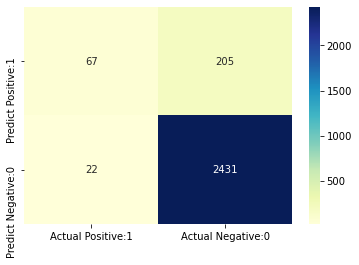

In [74]:
# visualize confusion matrix with seaborn heatmap
cm = confusion_matrix(y_test, y_pred_test)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [75]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.75      0.25      0.37       272
           1       0.92      0.99      0.96      2453

    accuracy                           0.92      2725
   macro avg       0.84      0.62      0.66      2725
weighted avg       0.91      0.92      0.90      2725



In [77]:
import pickle
with open('LR.pkl', 'wb') as file:
    pickle.dump(logreg, file)

### K-fold cross-validation 

In [28]:
scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')
#dividing into 5 datasets to do more tests of the model accuracy

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.90733945 0.91697248 0.91743119 0.91559633 0.91463974]


In [29]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9144


## filling NA values with model predection 

In [30]:
df_na = df_na[df_na["ClientSatisfaction"].isna()]
#df_na['ProcessingDays'] = (df_na['CompletionDate'] - df_na['ComplainDate']).dt.days

In [31]:
df_na = df_na.drop(['ClientSatisfaction'], axis=1)

In [32]:
df_na = df_na[df_na['AdministratorID'].notna()]
df_na = df_na[df_na['ProcessingDays'].notna()]

In [36]:
x_eval = scaler.fit_transform(df_na)

ValueError: Found array with 0 sample(s) (shape=(0, 11)) while a minimum of 1 is required by MinMaxScaler.

In [35]:
x_eval = pd.DataFrame(x_eval, columns=[X.columns])

NameError: name 'x_eval' is not defined

In [ ]:
y_pred_eval = logreg.predict(x_eval)

In [34]:
df_na["ClientSatisfaction"] = y_pred_eval

NameError: name 'y_pred_eval' is not defined

In [33]:
df_na.loc[df_na["ClientSatisfaction"] == 0, "ClientSatisfaction"] = "NSA"
df_na.loc[df_na["ClientSatisfaction"] == 1, "ClientSatisfaction"] = "SAT"

In [34]:
df_na

,ID,BrokerID,ProductID,ComplainPriorityID,ComplainTypeID,ComplainSourceID,ComplainCategoryID,AdministratorID,ExpectedReimbursement,Handled_By,ProcessingDays,ClientSatisfaction
3,17,10637,4,1,5,5,11,98.0,0.0,1003,31.0,NSA
4,18,12116,12,1,3,5,10,98.0,0.0,1017,22.0,NSA
5,19,11104,6,1,3,5,18,98.0,0.0,1013,49.0,NSA
6,20,11474,8,1,7,3,10,98.0,0.0,1005,15.0,NSA
13,28,10127,32,1,7,3,11,98.0,0.0,1006,6.0,NSA
...,...,...,...,...,...,...,...,...,...,...,...,...
13792,14520,11244,40,2,5,5,64,85.0,0.0,1000,1.0,SAT
13794,14522,10361,66,2,5,5,40,85.0,0.0,1004,9.0,SAT
13799,14529,11954,13,2,5,5,64,85.0,0.0,1019,2.0,SAT
13815,14545,2532,17,2,5,5,10,42.0,0.0,1011,0.0,SAT


In [35]:
df_na.to_csv("predictedClientSatisfaction.csv")

Text(0, 0.5, 'Number of Clients')

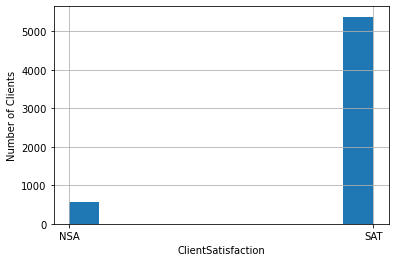

In [36]:
fig = df_na.ClientSatisfaction.hist(bins=10)
fig.set_xlabel('ClientSatisfaction')
fig.set_ylabel('Number of Clients')